# Erasmus Neural Networks
http://michalbereta.pl/nn
## Multi Layer Perceptron with two hidden layers

## Basic regularization


## Before you start

Exacute the examples.

Then, do the tasks and send back the notebook.

Change the name of this notebook according to the schema: {YourSurname}\_{YourFirstName}\_{OriginalFileName}.

Be sure to fill all places with "YOUR ANSWER HERE".

When ready, send the notebook, with all the necessary files zipped, to the teacher.

### Multi Layer Perceptron for Sofmax - two hidden layers with sigmoidal activation and regularization

To use regularization, set `lmbda` to some small value, e.g., 0.001.

Put the MNIST data files in the same folder before running the example.

In [2]:
import numpy as np

class SoftMax2HL:
    def __init__(self, inputs_num, outputs_num, hidden_num1, hidden_num2):
        self.inum = inputs_num
        self.onum = outputs_num
        self.W1 = (-1 + 2*np.random.rand(inputs_num, hidden_num1))/np.sqrt(inputs_num) #neurons as columns
        self.b1 = np.zeros((1, hidden_num1)) #horizontal vector
        self.W2 = (-1 + 2*np.random.rand(hidden_num1, hidden_num2))/np.sqrt(hidden_num1) #neurons as columns
        self.b2 = np.zeros((1, hidden_num2)) #horizontal vector
        self.W3 = (-1 + 2*np.random.rand(hidden_num2, outputs_num))/np.sqrt(hidden_num2) #neurons as columns
        self.b3 = np.zeros((1, outputs_num)) #horizontal vector
        self.probs = None
    def Forward(self, X): #examples as rows in X
        self.u1 = np.dot(X, self.W1) + self.b1
        self.hout1 = 1.0/(1.0 + np.exp(-self.u1))
        self.u2 = np.dot(self.hout1, self.W2) + self.b2
        self.hout2 = 1.0/(1.0 + np.exp(-self.u2))
        f = np.dot(self.hout2, self.W3) + self.b3
        f -= np.max(f, axis=1, keepdims=True) #trick for numerical stability
        probs = np.exp(f)
        probs /= np.sum(probs, axis=1, keepdims=True)
        self.probs = probs
    def Test(self, X, ClsIndx):
        self.Forward(X)
        #data loss: mean cross-entropy loss
        ex_num = X.shape[0]
        data_loss = -np.log(self.probs[range(ex_num),ClsIndx]).sum()/ex_num
        #classification error
        predictions = np.argmax(self.probs, axis=1)
        errors_num = np.sum(predictions != ClsIndx)
        error_rate = errors_num / ex_num
        return (data_loss, error_rate, errors_num)
    def GetProbs(self):
        return self.probs
    def GetPredictions(self):
        return np.argmax(self.probs, axis=1)
    def Learn(self, X, ClsIndx, lrate):
        self.Forward(X)
        #gradients of outputs (class probabilities)
        ex_num = X.shape[0]
        dprobs = self.probs.copy()
        dprobs[range(ex_num), ClsIndx] -= 1.0
        dprobs /= ex_num #average over all examples
        #gradient of weights and biases - output layer
        dW3 = np.dot(self.hout2.T, dprobs) # chain rule to calculate gradients
        db3 = np.sum(dprobs, axis=0,keepdims=True)
        
        #update neurons - output layer
        lmbda = 0.0001 # regularization parameter
        self.W3 = self.W3 - lrate*dW3 - lmbda*self.W3
        self.b3 = self.b3 - lrate*db3 - lmbda*self.b3
        self.dW3 = dW3
        self.db3 = db3
        
        #gradient of weights and biases - 2 hidden layer
        temp = np.dot(dprobs, self.W3.T)
        du2 = self.hout2*(1 - self.hout2)
        temp = temp * du2  #note! this is not a matrix multiplication! this is element-wise multiplication
        dW2 = np.dot(self.hout1.T, temp) # chain rule to calculate gradients
        db2 = np.sum(temp, axis=0,keepdims=True)
        #update neurons - second hidden layer
        self.W2 = self.W2 - lrate*dW2 - lmbda*self.W2
        self.b2 = self.b2 - lrate*db2 - lmbda*self.b2       
        self.dW2 = dW2
        self.db2 = db2
        
        #gradient of weights and biases - 1 hidden layer
        temp = np.dot(temp, self.W2.T)
        du1 = self.hout1*(1 - self.hout1)
        temp = temp * du1  #note! this is not a matrix multiplication! this is element-wise multiplication
        dW1 = np.dot(X.T, temp) # chain rule to calculate gradients
        db1 = np.sum(temp, axis=0,keepdims=True)
        #update neurons - first hidden layer
        self.W1 = self.W1 - lrate*dW1 - lmbda*self.W1
        self.b1 = self.b1 - lrate*db1 - lmbda*self.b1       
        self.dW1 = dW1
        self.db1 = db1

reading train data...
(60000, 784)
(60000,)

reading test data...
(10000, 784)
(10000,)

dloss: 2.327190319527914
erate: 0.8876333333333334
errors: 53258
test dloss: 2.3280659451911028
test erate: 0.8865
test errors: 8865
starting learning...

iteration 1
eta 0.1
dloss: 2.313638334210805
erate: 0.8876333333333334
errors: 53258
test dloss: 2.3142800914679023
test erate: 0.8865
test errors: 8865

iteration 2
eta 0.1
dloss: 2.3072306468117287
erate: 0.8876333333333334
errors: 53258
test dloss: 2.3076673668667738
test erate: 0.8865
test errors: 8865

iteration 3
eta 0.1
dloss: 2.3040610505916606
erate: 0.8876333333333334
errors: 53258
test dloss: 2.3043334533707633
test erate: 0.8865
test errors: 8865

iteration 4
eta 0.1
dloss: 2.3024539113746303
erate: 0.8876333333333334
errors: 53258
test dloss: 2.3025997927959794
test erate: 0.8865
test errors: 8865

iteration 5
eta 0.1
dloss: 2.3016191765959646
erate: 0.8876333333333334
errors: 53258
test dloss: 2.301669730367623
test erate: 0.8865
te

test dloss: 2.2976389019589822
test erate: 0.8865
test errors: 8865

iteration 53
eta 0.1
dloss: 2.2978427132030093
erate: 0.8876333333333334
errors: 53258
test dloss: 2.2975737260097278
test erate: 0.8865
test errors: 8865

iteration 54
eta 0.1
dloss: 2.297778829564226
erate: 0.8876333333333334
errors: 53258
test dloss: 2.297508461695698
test erate: 0.8865
test errors: 8865

iteration 55
eta 0.1
dloss: 2.29771485739124
erate: 0.8876333333333334
errors: 53258
test dloss: 2.2974431070721977
test erate: 0.8865
test errors: 8865

iteration 56
eta 0.1
dloss: 2.2976507947744267
erate: 0.8876333333333334
errors: 53258
test dloss: 2.297377660189215
test erate: 0.8865
test errors: 8865

iteration 57
eta 0.1
dloss: 2.2975866397985256
erate: 0.8876333333333334
errors: 53258
test dloss: 2.297312119091204
test erate: 0.8865
test errors: 8865

iteration 58
eta 0.1
dloss: 2.297522390542508
erate: 0.8876333333333334
errors: 53258
test dloss: 2.297246481816898
test erate: 0.8865
test errors: 8865

ite

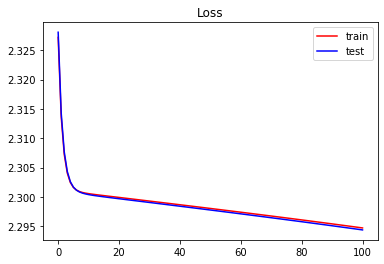

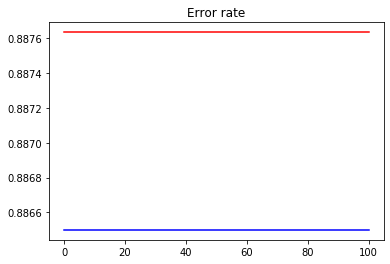

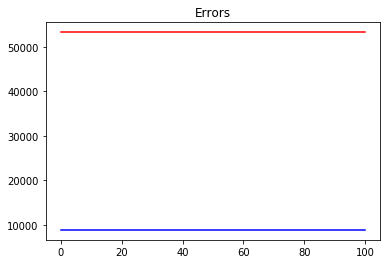

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle       
        


#train data
print('reading train data...')
X = np.loadtxt('mnist_train.csv', delimiter=',')
labels = X[:,0].astype('int32') #the first column contains class labels
X = X[:,1:] #the rest of the columns are pixel values
X = X/255.0 #simple cormalization
print(X.shape)
print(labels.shape)
print()

#test data
print('reading test data...')
Xte = np.loadtxt('mnist_test.csv', delimiter=',')
labelste = Xte[:,0].astype('int32') #the first column contains class labels
Xte = Xte[:,1:] #the rest of the columns are pixel values
Xte = Xte/255.0 #simple cormalization
print(Xte.shape)
print(labelste.shape)
print()


net = SoftMax2HL(784, 10, 200, 100) #num of inputs = num of pixels; num of outputs = num of classes

#learning statistics
trloss = []
teloss = []
trerate = []
teerate = []
trerrors = []
teerrors = []

#checking the answers before training
(dloss, erate, errors) = net.Test(X, labels)
print('dloss:',dloss)
print('erate:',erate)
print('errors:',errors)
trloss.append(dloss)
trerate.append(erate)
trerrors.append(errors)

(dloss, erate, errors) = net.Test(Xte, labelste)
print('test dloss:',dloss)
print('test erate:',erate)
print('test errors:',errors)
teloss.append(dloss)
teerate.append(erate)
teerrors.append(errors)

print('starting learning...')
counter = 1
max_iters = 100
min_loss = 0.1

while True:
    etamin = 0.1
    etamax = 0.1
    eta = etamin + (1 - float(counter)/max_iters) * (etamax - etamin)
    if eta < etamin:
        eta = etamin
    net.Learn(X, labels, eta)
    (dloss, erate, errors) = net.Test(X, labels)
    print('\niteration', counter)
    print('eta',eta)
    print('dloss:',dloss)
    print('erate:',erate)
    print('errors:',errors)
    trloss.append(dloss)
    trerate.append(erate)
    trerrors.append(errors)
    #checking test data
    (dloss, erate, errors) = net.Test(Xte, labelste)
    print('test dloss:',dloss)
    print('test erate:',erate)
    print('test errors:',errors)
    teloss.append(dloss)
    teerate.append(erate)
    teerrors.append(errors)    
#    print('W1 max:',net.W1.max())
#    print('b1 max:',net.b1.max())
#    print('W2 max:',net.W2.max())
#    print('b2 max:',net.b2.max())
    counter += 1
    if dloss < min_loss:
        break
    if counter > max_iters:
        break
#    if erate < 0.005:
#        break
#    if math.isnan(dloss):
#        break
#    if counter % 1000 == 0:
#        #save
#        f = open(str(counter)+'my_softmax1hl_mnist.net','wb')
#        pickle.dump(net, f)
#        f.close()
print('learning finished')

#save
f = open('my_softmax2hl_mnist_200_100.net','wb')
pickle.dump(net, f)
f.close()

print('Minimum training error rate: ', min(trerate),' for iteration ',np.argmin(trerate))
print('Minimum testing error rate: ', min(teerate),' for iteration ',np.argmin(teerate))

plt.figure()
plt.plot(trloss, 'r', label='train')
plt.plot(teloss, 'b', label='test')
plt.title('Loss')
plt.legend()

plt.figure()
plt.plot(trerate, 'r', label='train')
plt.plot(teerate, 'b', label='test')
plt.title('Error rate')

plt.figure()
plt.plot(trerrors, 'r', label='train')
plt.plot(teerrors, 'b', label='test')
plt.title('Errors')

plt.show()
